In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertModel, BertPreTrainedModel, DistilBertTokenizer, DistilBertModel, DistilBertPreTrainedModel
from sklearn.metrics import mean_squared_error, cohen_kappa_score

In [90]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [91]:
df2 = pd.read_csv("df_all_sets_with_feature.csv")
df2

,Unnamed: 0,essay_id,essay_set,essay,num_grammatical_errors,lexical_repetition_ratio,unique_lemmas_count,avg_sentence_length,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade,overall_score,scaled_score
0,0,1,1,"Dear local newspaper, I think effects computer...",17,0.523810,95,24.687500,8,0.666667,0.835594,74.02,8.5,8.0,0.600000
1,1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",24,0.606557,105,22.800000,8,0.591549,0.851565,67.08,9.1,9.0,0.700000
2,2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",14,0.508333,75,20.400000,4,0.697674,0.891696,68.20,8.7,7.0,0.500000
3,3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",29,0.600000,155,21.333333,11,0.656250,0.826223,60.24,9.7,10.0,0.800000
4,4,5,1,"Dear @LOCATION1, I know having computers has a...",18,0.631285,102,17.266667,9,0.594470,0.868435,72.66,7.0,8.0,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12972,12973,21626,8,In most stories mothers and daughters are eit...,19,0.575472,188,23.243902,19,0.627072,0.794858,65.09,12.0,35.0,0.583333
12973,12974,21628,8,I never understood the meaning laughter is th...,44,0.701357,110,16.282051,7,0.550000,0.791210,91.11,4.0,32.0,0.533333
12974,12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",14,0.537143,220,21.222222,17,0.745509,0.766729,69.11,8.3,40.0,0.666667
12975,12976,21630,8,Trippin' on fen...,6,0.574766,127,17.076923,21,0.663793,0.819285,81.83,5.5,40.0,0.666667


In [92]:
df2.columns

Index(['Unnamed: 0', 'essay_id', 'essay_set', 'essay',
       'num_grammatical_errors', 'lexical_repetition_ratio',
       'unique_lemmas_count', 'avg_sentence_length',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade',
       'overall_score', 'scaled_score'],
      dtype='object')

In [93]:
df2.isna().sum()

Unnamed: 0                    0
essay_id                      0
essay_set                     0
essay                         0
num_grammatical_errors        0
lexical_repetition_ratio      0
unique_lemmas_count           0
avg_sentence_length           0
discourse_connective_count    0
vocabulary_richness           0
semantic_relevance            0
flesch_reading_ease           0
flesch_kincaid_grade          0
overall_score                 0
scaled_score                  0
dtype: int64

In [12]:
df = df2.dropna()
df.isna().sum()

Unnamed: 0                    0
essay_id                      0
essay_set                     0
essay                         0
num_grammatical_errors        0
lexical_repetition_ratio      0
unique_lemmas_count           0
avg_sentence_length           0
discourse_connective_count    0
vocabulary_richness           0
semantic_relevance            0
flesch_reading_ease           0
flesch_kincaid_grade          0
overall_score                 0
scaled_score                  0
dtype: int64

In [94]:
features = df[['essay',
       'num_grammatical_errors', 'lexical_repetition_ratio',
       'unique_lemmas_count', 'avg_sentence_length',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade']]

scores = df[["scaled_score", "overall_score", "essay_set", "essay_id"]]
features, scores

(                                                   essay  \
 0      Dear local newspaper, I think effects computer...   
 1      Dear @CAPS1 @CAPS2, I believe that using compu...   
 2      Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
 3      Dear Local Newspaper, @CAPS1 I have found that...   
 4      Dear @LOCATION1, I know having computers has a...   
 ...                                                  ...   
 12972   In most stories mothers and daughters are eit...   
 12973   I never understood the meaning laughter is th...   
 12974  When you laugh, is @CAPS5 out of habit, or is ...   
 12975                                 Trippin' on fen...   
 12976   Many people believe that laughter can improve...   
 
        num_grammatical_errors  lexical_repetition_ratio  unique_lemmas_count  \
 0                          17                  0.523810                   95   
 1                          24                  0.606557                  105   
 2                     

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [96]:
train_features, test_features, train_scores, test_scores = train_test_split(features, scores, test_size=0.2, random_state=42)
len(train_features), len(test_features), len(train_scores), len(test_scores)

(10381, 2596, 10381, 2596)

In [100]:
test_scores

,scaled_score,overall_score,essay_set,essay_id
4999,0.333333,1.0,3,7398
8725,0.750000,3.0,5,13472
4606,0.666667,2.0,3,7004
4393,0.666667,2.0,3,6790
3404,0.500000,6.0,2,4599
...,...,...,...,...
6044,0.666667,2.0,4,9600
9251,1.000000,4.0,6,15200
3860,0.333333,1.0,3,6256
3314,0.375000,5.0,2,4509


In [16]:
train_features.to_csv("train_features_222.csv", index=False)
train_scores.to_csv("train_scores_222.csv", index=False)

In [11]:
test_features.to_csv("test_features_222.csv", index=False)
test_scores.to_csv("test_scores_222.csv", index=False)

In [2]:
train_features = pd.read_csv("train_features_with_fs.csv")
train_scores = pd.read_csv("train_scores_with_fs.csv")
test_features = pd.read_csv("test_features_with_fs.csv")
test_scores = pd.read_csv("test_scores_with_fs.csv")

In [101]:
train_essays = train_features["essay"]
test_essays = test_features["essay"]
train_features_extract = train_features.drop("essay", axis=1)
test_features_extract = test_features.drop("essay", axis=1)

In [102]:
train_features_extract

,num_grammatical_errors,lexical_repetition_ratio,unique_lemmas_count,avg_sentence_length,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade
7533,1,0.580000,30,23.166667,4,0.723404,0.708215,76.35,7.6
3021,13,0.442308,38,18.400000,3,0.733333,0.902557,82.14,5.4
2372,12,0.795455,69,17.740741,9,0.477273,0.853517,80.62,6.0
8807,2,0.818182,19,22.600000,6,0.478261,0.772706,50.57,11.3
7852,1,0.466667,22,26.333333,1,0.741935,0.764080,65.05,9.9
...,...,...,...,...,...,...,...,...,...
11964,5,0.441176,25,16.125000,6,0.790698,0.853260,90.60,4.2
5191,7,0.357895,75,19.000000,7,0.854545,0.746701,71.85,7.3
5390,7,0.484848,24,17.333333,6,0.785714,0.819842,80.82,5.9
860,56,0.485915,195,22.806452,9,0.707006,0.742490,73.61,8.7


In [103]:
scaled_features_train = scaler.fit_transform(train_features_extract)
scaled_features_test = scaler.transform(test_features_extract)

In [104]:
scaled_features_train_df = pd.DataFrame(scaled_features_train, columns=train_features_extract.columns)
scaled_features_test_df = pd.DataFrame(scaled_features_test, columns=test_features_extract.columns)


In [106]:
scaled_features_test_df.isna().sum()

num_grammatical_errors        0
lexical_repetition_ratio      0
unique_lemmas_count           0
avg_sentence_length           0
discourse_connective_count    0
vocabulary_richness           0
semantic_relevance            0
flesch_reading_ease           0
flesch_kincaid_grade          0
dtype: int64

In [146]:
scaled_features_train_df.to_csv("scaled_train_222.csv")

In [147]:
scaled_features_test_df.to_csv("scaled_test_222.csv")

In [ ]:
scaled_features_train_df = pd.read_csv("scaled_train_fs.csv")
scaled_features_test_df = pd.read_csv("scaled_test_fs.csv")

In [65]:
scaled_features_train_df =scaled_features_train_df.drop(columns=["Unnamed: 0"])
scaled_features_train_df.isna().sum()


KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
scaled_features_test_df =scaled_features_test_df.drop(columns=["Unnamed: 0"])
scaled_features_test_df.isna().sum()


,0
num_grammatical_errors,0
lexical_repetition_ratio,0
unique_lemmas_count,0
avg_sentence_length,0
discourse_connective_count,0
vocabulary_richness,0
semantic_relevance,0
flesch_reading_ease,0
flesch_kincaid_grade,0


In [107]:
scaled_features_train_df.isna().sum()


num_grammatical_errors        0
lexical_repetition_ratio      0
unique_lemmas_count           0
avg_sentence_length           0
discourse_connective_count    0
vocabulary_richness           0
semantic_relevance            0
flesch_reading_ease           0
flesch_kincaid_grade          0
dtype: int64

In [108]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [109]:
import torch
from torch.utils.data import Dataset, DataLoader
batch_size = 8
class EssayDataset(Dataset):
    def __init__(self, essays, scores, features, tokenizer, max_length=512):
        self.essays = essays.to_list()
        self.overall_scores = scores["scaled_score"].values.tolist()
        self.original_scores = scores["overall_score"].values.tolist()
        self.meta = scores[['essay_id', 'essay_set']].values.tolist()
        self.features = features.values.tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.essays)

    def __getitem__(self, idx):
        essay = self.essays[idx]

        overall_score = self.overall_scores[idx]
        original_score = self.original_scores[idx]
        meta = self.meta[idx]
        feature = self.features[idx]

        tokens = self.tokenizer(essay, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')

        return {'input_ids': tokens['input_ids'].squeeze().to(device),
        'attention_mask': tokens['attention_mask'].squeeze().to(device),
        'overall_score': torch.tensor(overall_score, dtype=torch.float).to(device),
        'original_score': original_score,
        'meta': meta,
        'features': torch.tensor(feature, dtype=torch.float).to(device)}

# Example usage:
train_dataset = EssayDataset(train_essays,
                             train_scores,
                             scaled_features_train_df,
                             tokenizer)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [113]:
import torch.nn as nn
class BertForRegression(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        input_dim = config.hidden_size + 9
        self.batch_norm = nn.BatchNorm1d(input_dim)
        self.overall_head = nn.Linear(input_dim, 1)

    def forward(self, input_ids, attention_mask=None, features = None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]

        # Concatenate features to the CLS output
        if features is not None:
            # Ensure features are of the right type and on the correct device
            features = features.to(cls_output.device, dtype=cls_output.dtype)
            combined_output = torch.cat((cls_output, features), dim=1)  # Concatenate along the feature dimension
            combined_output = self.batch_norm(combined_output)
        else:
            combined_output = cls_output  # If no features are provided, use only the CLS output
        overall = self.overall_head(combined_output)
        return overall

In [114]:
from transformers import BertConfig
import torch.optim as optim

config = BertConfig.from_pretrained('bert-base-uncased')
model = BertForRegression.from_pretrained('bert-base-uncased', config=config).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
criterion = torch.nn.MSELoss()

Some weights of BertForRegression were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['batch_norm.bias', 'batch_norm.num_batches_tracked', 'batch_norm.running_mean', 'batch_norm.running_var', 'batch_norm.weight', 'overall_head.bias', 'overall_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [78]:
test_dataset = EssayDataset(test_essays,
                             test_scores,
                             scaled_features_test_df,
                             tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [115]:
# Loading a checkpoint
checkpoint = torch.load('model_checkpoint_epoch_8.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch'] + 1  # Resume from the next epoch
 # Optionally load the loss


In [116]:
len(checkpoint['train_losses']), len(checkpoint['val_losses'])

(7, 7)

In [80]:
# Function to evaluate the model on the validation set
def evaluate(model, test_dataloader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            scores = batch['overall_score']
            features = batch["features"]

            outputs = model(input_ids, attention_mask=attention_mask, features=features)

            loss = criterion(outputs.squeeze(), scores.squeeze())
            total_loss += loss.item()
    return total_loss / len(test_dataloader)


In [ ]:
# num_epochs = 5
# for epoch in range(num_epochs):
#     model.train()
#     for batch in train_dataloader:
#         input_ids = batch['input_ids']
#         attention_mask = batch['attention_mask']

#         overall_scores = batch["overall_score"]
#         features = batch["features"]

#         optimizer.zero_grad()
#         outputs = model(input_ids, attention_mask=attention_mask, features=features)


#         loss = criterion(outputs.squeeze(), overall_scores.squeeze())
#         # print(loss)

#         loss.backward()

#         optimizer.step()

#     print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

In [81]:
num_epochs = 10
best_val_loss = float('inf')  # For saving the best model
checkpoint_interval = 2       # Save every 5 epochs

# Lists to store losses for plotting later
train_losses =[]
val_losses = []

In [82]:
import torch
import matplotlib.pyplot as plt

for epoch in range(0, num_epochs):
    # Training Phase
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        overall_scores = batch["overall_score"]
        features = batch["features"]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, features=features)
        loss = criterion(outputs.squeeze(), overall_scores.squeeze())
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)  # Store training loss

    val_loss = evaluate(model, test_dataloader, criterion)
    val_losses.append(val_loss)

    # Print Training and Validation Loss
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print(f'Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Save model checkpoint every 5 epochs or if validation loss improves
    if (epoch + 1) % checkpoint_interval == 0 or val_loss < best_val_loss:
        print(f"Saving checkpoint at epoch {epoch + 1}")
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses': train_losses,
            'val_losses': val_losses,
        }
        torch.save(checkpoint, f'model_checkpoint_epoch_{epoch + 1}.pth')
        best_val_loss = val_loss  # Update best loss if validation loss improves


Epoch 1/10
Training Loss: 0.0276, Validation Loss: 0.0241
Saving checkpoint at epoch 1
Epoch 2/10
Training Loss: 0.0204, Validation Loss: 0.0190
Saving checkpoint at epoch 2
Epoch 3/10
Training Loss: 0.0163, Validation Loss: 0.0211


KeyboardInterrupt: 

In [70]:
train_losses

[0.06492079929952713,
 0.04136738156776175,
 0.04100374578822437,
 0.0407323021503269,
 0.040890070022649216]

In [71]:
val_losses

[0.04279485048991857,
 0.04551895757156276,
 0.03883317846747277,
 0.04238312355603575,
 0.046470610040113706]

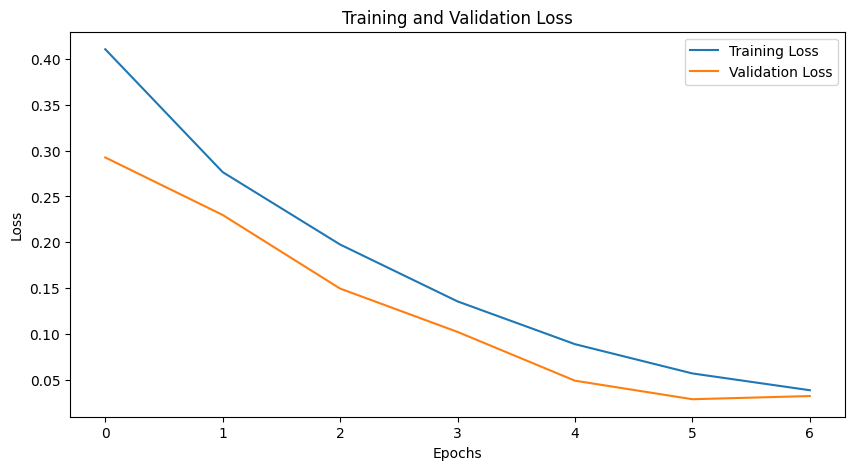

In [118]:
import matplotlib.pyplot as plt 
train_losses = checkpoint["train_losses"]
val_losses = checkpoint["val_losses"]
# Plotting the losses after training
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [88]:
train_losses =  checkpoint['train_losses']
val_losses = checkpoint['val_losses']

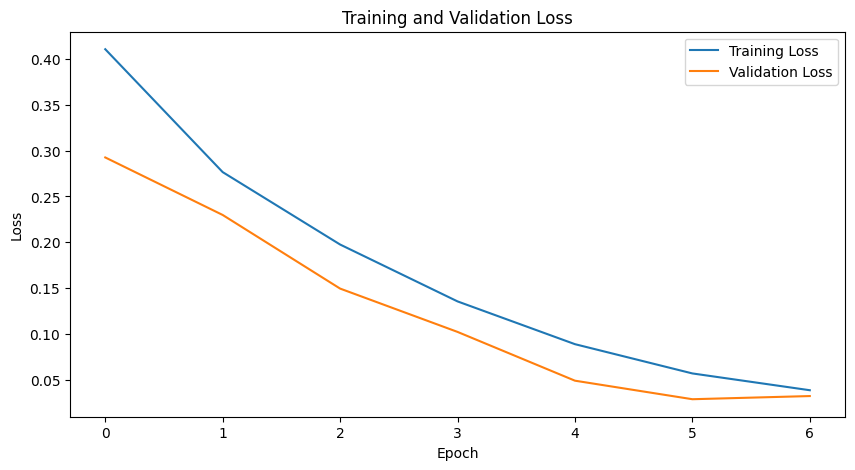

In [119]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Set ticks with a spacing of 1
plt.xticks(range(0, len(train_losses), 1))  # x-axis with a space of 1
plt.show()



In [120]:
test_dataset = EssayDataset(test_essays, test_scores, scaled_features_test_df, tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=4)

In [ ]:
torch.save(model.state_dict(), 'model_with_all_sets_2.pt')

In [ ]:
model.load_state_dict(torch.load('model_with_all_sets_2.pt', map_location=device))

<ipython-input-50-8f09ee6a5f8a>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_all_sets_2.pt', map_location=device))


<All keys matched successfully>

In [121]:
score_ranges = {
    1: (2, 12),  # Essay Set 1
    2: (2, 10),  # Essay Set 2
    3: (0, 3),   # Essay Set 3
    4: (0, 3),   # Essay Set 4
    5: (0, 4),   # Essay Set 5
    6: (0, 4),   # Essay Set 6
    7: (0, 30),  # Essay Set 7
    8: (0, 60)   # Essay Set 8
}

def inverse_min_max_scaling(predicted_val, essay_set):
    if essay_set in score_ranges:
        min_value, max_value = score_ranges[essay_set]

        if max_value != min_value:  # Avoid division by zero
            scale_up_predicted = predicted_val* (max_value - min_value) + min_value
        else:
            scale_up_predicted = min_value  # If all values were the same, original value is min_value
    else:
        raise ValueError(f"Invalid essay set number: {essay_set}")

    return scale_up_predicted


In [122]:
from sklearn.metrics import cohen_kappa_score
# Set model to evaluation mode
model.eval()

# Initialize variables for evaluation
all_predictions = []
all_targets = []
eval_loss = 0

# Disable gradient calculations for testing
with torch.no_grad():
    for batch in test_dataloader:
        # Extract inputs and move to the appropriate device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        overall_scores = batch["overall_score"].to(device)
        actual_score = batch["original_score"]
        essay_sets = batch["meta"][1]
        features = batch["features"].to(device)

        # Get predictions from the model
        outputs = model(input_ids, attention_mask=attention_mask, features=features)
        # Calculate the evaluation loss for this batch
        eval_loss += criterion(outputs.squeeze(), overall_scores.squeeze()).item()

        print("output" ,outputs.squeeze())
        print("overall" , overall_scores.squeeze())


        outputs_squeeze = outputs.squeeze().cpu().numpy()
        essay_setss = essay_sets.cpu().numpy()

        # Collect predictions and actual targets for further evaluation
        for i in range(len(outputs_squeeze)):
            scale_up_score = inverse_min_max_scaling(outputs_squeeze[i], essay_setss[i])
            all_predictions.append(scale_up_score)  # Assuming the last column is the overall score
        all_targets.extend(actual_score.numpy())

# Calculate the average evaluation loss over all batches
avg_eval_loss = eval_loss / len(test_dataloader)
print(f'Validation Loss: {avg_eval_loss}')

# Convert predictions and targets to numpy arrays for QWK calculation
all_predictions = np.array(all_predictions).flatten()
all_targets = np.array(all_targets).flatten()

# Round predictions to the nearest integer for QWK
all_predictions_rounded = np.rint(all_predictions).astype(int)
all_targets_int = all_targets.astype(int)

# Calculate QWK for the overall score
qwk_overall = cohen_kappa_score(all_targets_int, all_predictions_rounded, weights='quadratic')
print(f'QWK Overall: {qwk_overall}')


output tensor([0.3084, 0.7140, 0.3106, 0.5946], device='cuda:0')
overall tensor([0.3333, 0.7500, 0.6667, 0.6667], device='cuda:0')
output tensor([0.4826, 0.5268, 0.6735, 0.3312], device='cuda:0')
overall tensor([0.5000, 0.6667, 0.7000, 0.6000], device='cuda:0')
output tensor([0.3596, 0.3673, 0.4528, 0.3606], device='cuda:0')
overall tensor([0.3750, 0.5000, 0.6000, 0.6000], device='cuda:0')


output tensor([0.6405, 0.4895, 0.6628, 0.8339], device='cuda:0')
overall tensor([0.7000, 0.7000, 0.7500, 1.0000], device='cuda:0')
output tensor([0.5846, 0.2684, 0.5919, 0.3426], device='cuda:0')
overall tensor([0.6250, 0.5667, 0.6667, 0.3333], device='cuda:0')
output tensor([0.4095, 0.4365, 0.2213, 0.3738], device='cuda:0')
overall tensor([0.3750, 0.5000, 0.3333, 0.5000], device='cuda:0')
output tensor([0.6037, 0.4338, 0.6085, 0.6521], device='cuda:0')
overall tensor([0.5000, 0.5000, 0.7500, 0.6667], device='cuda:0')
output tensor([0.3503, 0.8264, 0.6470, 0.1488], device='cuda:0')
overall tensor([0.6667, 0.7500, 0.7500, 0.0000], device='cuda:0')
output tensor([0.5619, 0.4335, 0.5632, 0.3130], device='cuda:0')
overall tensor([0.3750, 0.5667, 0.6667, 0.3333], device='cuda:0')
output tensor([0.4427, 0.4969, 0.8073, 0.7395], device='cuda:0')
overall tensor([0.5000, 0.6000, 1.0000, 0.7500], device='cuda:0')
output tensor([0.2875, 0.4544, 0.2418, 0.5753], device='cuda:0')
overall tensor([0.

In [74]:
all_predictions_rounded[:30], all_targets_int[:30]

(array([10, 16, 17,  3,  2,  9,  2,  1,  2,  3,  7,  2,  2,  2,  2,  2, 51,
         8,  3, 57,  2, 17, 16,  2,  2,  2,  3,  3,  2,  3]),
 array([10, 14, 15,  3,  2,  7,  1,  1,  2,  3,  7,  1,  1,  2,  2,  2, 40,
         7,  4, 36,  1, 20,  8,  1,  3,  2,  1,  3,  2,  3]))

In [ ]:
score_ranges = {
    1: (2, 12),  # Essay Set 1
    2: (2, 10),  # Essay Set 2
    3: (0, 3),   # Essay Set 3
    4: (0, 3),   # Essay Set 4
    5: (0, 4),   # Essay Set 5
    6: (0, 4),   # Essay Set 6
    7: (0, 30),  # Essay Set 7
    8: (0, 60)   # Essay Set 8
}

def inverse_min_max_scaling(predicted_val, essay_set):
    if essay_set in score_ranges:
        min_value, max_value = score_ranges[essay_set]

        if max_value != min_value:  # Avoid division by zero
            scale_up_predicted = predicted_val* (max_value - min_value) + min_value
        else:
            scale_up_predicted = min_value  # If all values were the same, original value is min_value
    else:
        raise ValueError(f"Invalid essay set number: {essay_set}")

    return scale_up_predicted


In [ ]:
model.eval()
index = 11
essay = test_essays.iloc[index]
score = test_scores.iloc[index]
essay_set = test_scores.iloc[index]["essay_set"]
feature = scaled_features_test_df.iloc[index]
def predict_essay(essay, model, tokenizer, device, features):
    model.eval()
    inputs = tokenizer(essay, return_tensors='pt', padding=True, truncation=True, max_length=512)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    feature_tensor = torch.tensor(features.values, dtype=torch.float32)
    features = feature_tensor.unsqueeze(0).to(device, dtype=torch.float)
    print(features.shape)

    with torch.no_grad():
      overall = model(input_ids=input_ids, attention_mask=attention_mask, features=features)
      predicted_overall = overall.squeeze().cpu().numpy()



    return predicted_overall

predicted_overall  = predict_essay(essay, model, tokenizer, device, feature)

scaled_up_predicted = inverse_min_max_scaling(predicted_overall, test_scores.iloc[index]["essay_set"])
print("predicted score \n ", scaled_up_predicted)
print("scaled predicted score \n ", predicted_overall)
print(test_essays.iloc[index])

print("\n")
print("actual: ", score)

torch.Size([1, 15])
predicted score 
  15.750163793563843
scaled predicted score 
  0.52500546
When most people think of patience they think of waiting. But that’s only half of it. Patience is waiting with out complaining, like when I went to the @ORGANIZATION1. It was about a five hour drive. I know that doesn’t seem like a lot but I @CAPS1 corridor. I just @CAPS1 them pure and simple. But me and my brother didn’t complain, mainly because the knight before our mom said two complained well sit with her in the hotel room the whole time. Isnt that scary,” so we finally go there .The week was fun, we ate good food played sweet games and wen’t to an awsome  museum. But on the ride back it was another trial of patience, even more so because we got in an accident.


actual:  scaled_score      0.6
overall_score    18.0
essay_set         7.0
Name: 11410, dtype: float64


In [58]:
for i in range(10):
  essay = test_essays.iloc[i]
  score = test_scores.iloc[i]
  essay_set = test_scores.iloc[index]["essay_set"]
  feature = scaled_features_test_df.iloc[index]
  predicted = predict_essay(essay, model, tokenizer, device, feature)
  scaled_up_predicted = inverse_min_max_scaling(predicted, test_scores.iloc[i]["essay_set"])
  print(i, "\n")
  print("predicted score \n ", np.round(scaled_up_predicted))
  print("scaled predicted score \n ", predicted)
  print(test_essays.iloc[index])

  print("\n")
  print("actual: ", score)
  print('---------------------------------')

NameError: name 'index' is not defined